# Exploratory Data Analysis - Fuel Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/fuel_data.csv')
df.head()

,vehicle_type,engine_capacity,fuel_type,distance_km,load_weight_kg,road_type,avg_speed_kmh,traffic_level,fuel_consumed_liters,mileage_kmpl,mileage_category
0,Bus,3.943566,Petrol,452.767844,1274.411245,Mixed,42.050879,Low,124.810770,3.627634,Low
1,Car,3.376337,Petrol,124.053942,3712.654164,Highway,38.596151,Medium,22.164024,5.597086,Low
2,Truck,2.583347,Diesel,405.624055,383.179032,Mixed,115.081866,High,108.769882,3.729195,Low
3,Bus,4.348283,Diesel,38.956006,4363.179013,Highway,40.989763,High,17.903467,2.175892,Low
4,Bus,3.896559,Petrol,450.435220,4140.584145,Highway,46.091858,Medium,153.819557,2.928335,Low


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vehicle_type          1000 non-null   object 
 1   engine_capacity       1000 non-null   float64
 2   fuel_type             1000 non-null   object 
 3   distance_km           1000 non-null   float64
 4   load_weight_kg        1000 non-null   float64
 5   road_type             1000 non-null   object 
 6   avg_speed_kmh         1000 non-null   float64
 7   traffic_level         1000 non-null   object 
 8   fuel_consumed_liters  1000 non-null   float64
 9   mileage_kmpl          1000 non-null   float64
 10  mileage_category      1000 non-null   object 
dtypes: float64(6), object(5)
memory usage: 86.1+ KB


,engine_capacity,distance_km,load_weight_kg,avg_speed_kmh,fuel_consumed_liters,mileage_kmpl
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.249142,259.671801,2510.971733,68.778738,63.153948,5.314587
std,1.021301,141.850977,1431.248452,28.625014,48.213341,3.114673
min,1.516212,10.092316,6.731355,20.207652,1.000000,1.329324
25%,2.329264,135.372842,1273.230648,44.007602,25.423757,3.223165
50%,3.251896,267.762310,2543.077011,68.729822,53.134593,4.459913
75%,4.124051,383.552723,3768.147453,93.381964,90.422918,6.600833
max,4.999012,499.859764,4988.114111,119.904950,282.103753,23.315758


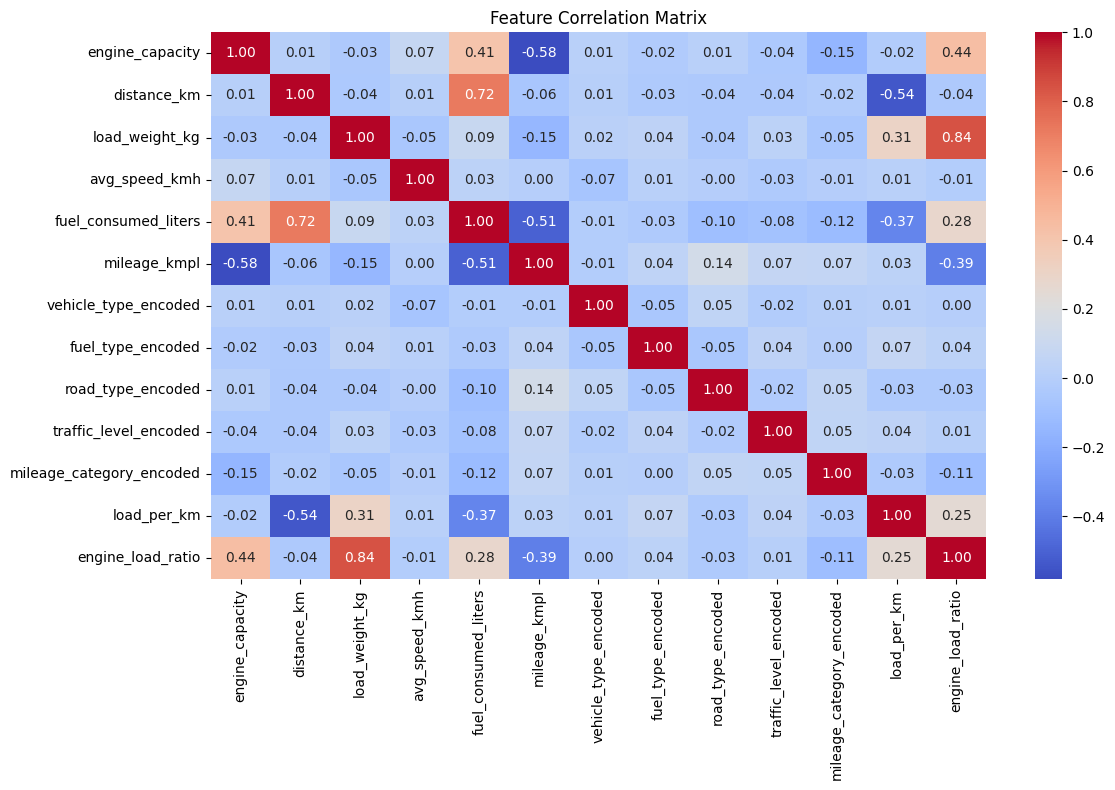

In [3]:
import sys
sys.path.append('../src')
from feature_engineering import engineer_features

df_processed = engineer_features(df)
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

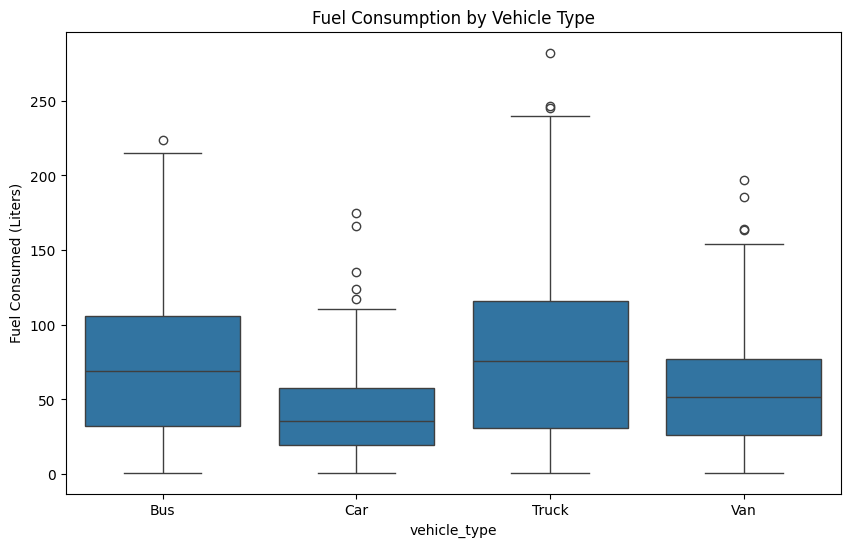

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='vehicle_type', y='fuel_consumed_liters')
plt.title('Fuel Consumption by Vehicle Type')
plt.ylabel('Fuel Consumed (Liters)')
plt.show()

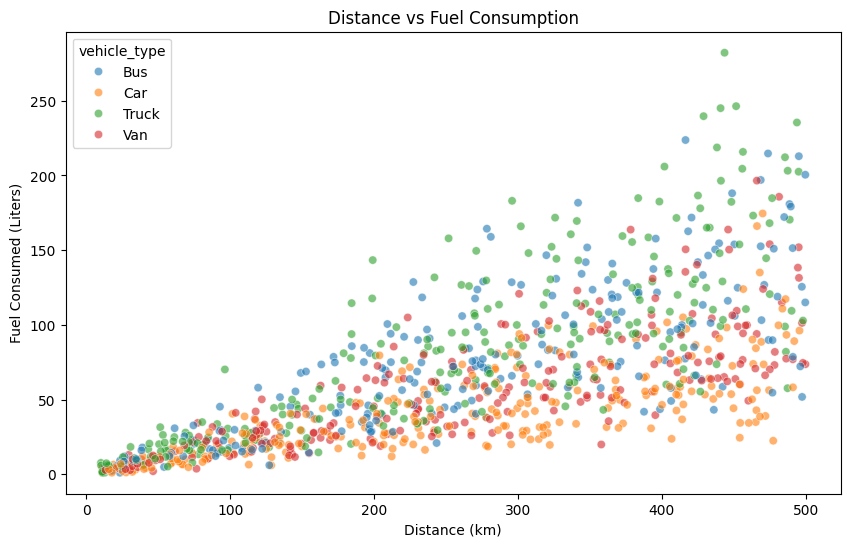

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_km', y='fuel_consumed_liters', hue='vehicle_type', alpha=0.6)
plt.title('Distance vs Fuel Consumption')
plt.xlabel('Distance (km)')
plt.ylabel('Fuel Consumed (Liters)')
plt.show()

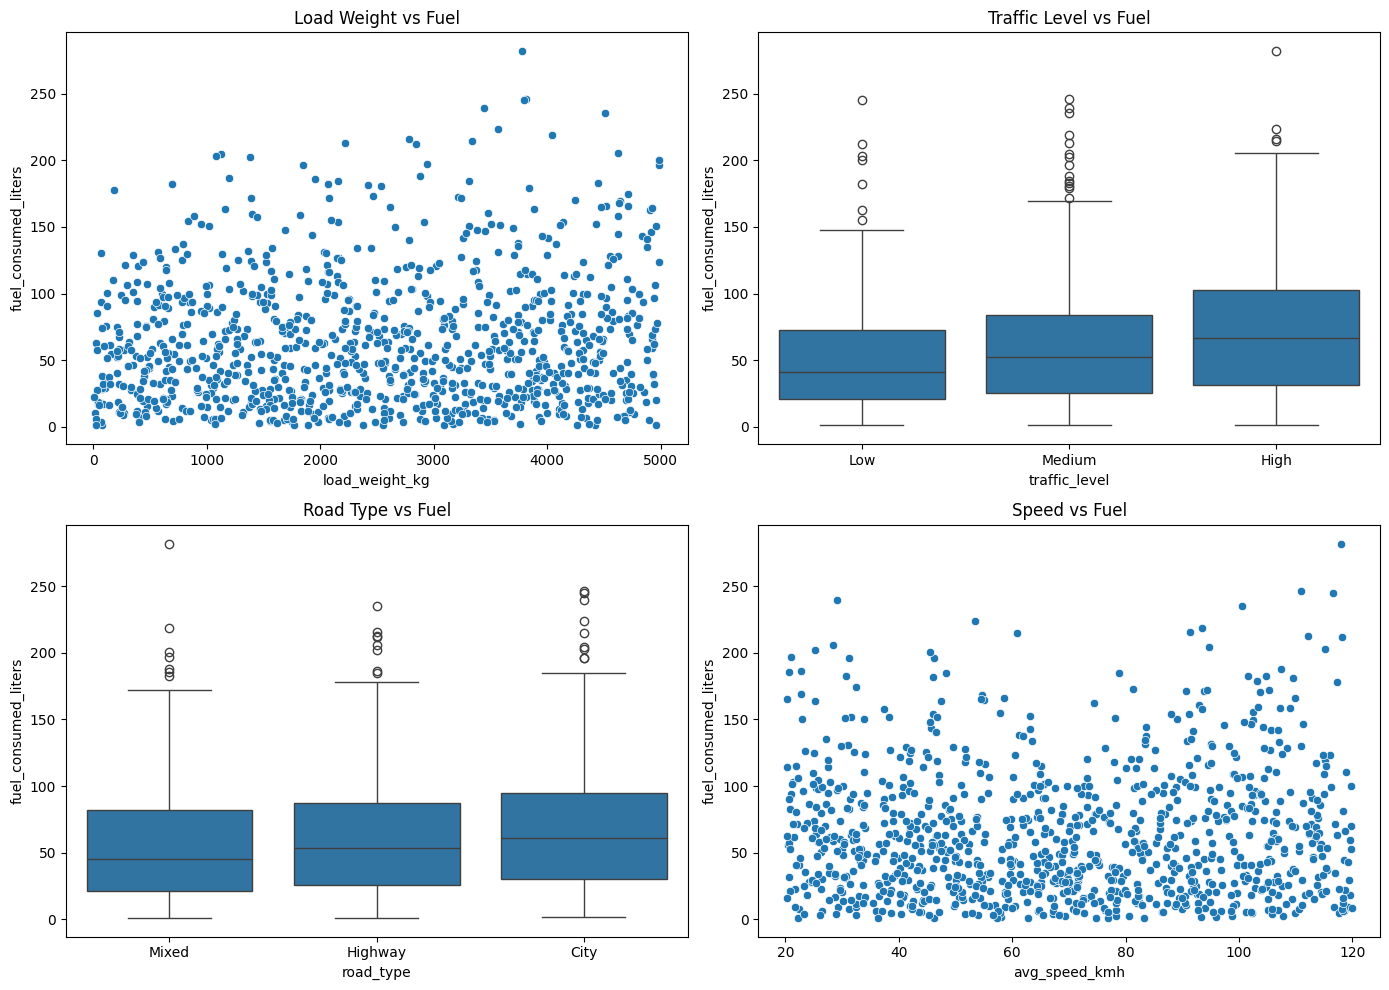

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='load_weight_kg', y='fuel_consumed_liters', ax=axes[0,0])
axes[0,0].set_title('Load Weight vs Fuel')

sns.boxplot(data=df, x='traffic_level', y='fuel_consumed_liters', ax=axes[0,1])
axes[0,1].set_title('Traffic Level vs Fuel')

sns.boxplot(data=df, x='road_type', y='fuel_consumed_liters', ax=axes[1,0])
axes[1,0].set_title('Road Type vs Fuel')

sns.scatterplot(data=df, x='avg_speed_kmh', y='fuel_consumed_liters', ax=axes[1,1])
axes[1,1].set_title('Speed vs Fuel')

plt.tight_layout()
plt.show()